In [1]:
import numpy as np
from matplotlib import pyplot as plt
import agents_enviroments


In [2]:
bays = [agents_enviroments.Bay() for _ in range(6)]
params = agents_enviroments.Parameters(C=0.05 ,V=1, m=0.67, k=0.4,treatment_prob=0.7,isolation_prob=0.1)
ward = agents_enviroments.Ward(bays,params=params)


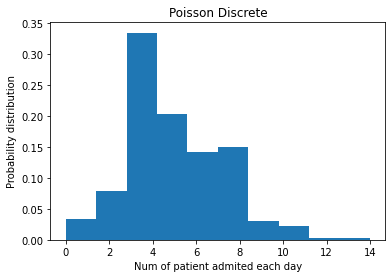

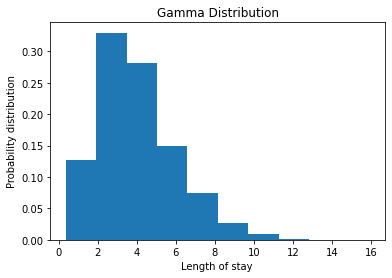

In [3]:
patient_generator = agents_enviroments.PatientGenerator()
patient_generator.set_var(poisson_lambda=5,gamma_k=4,gamma_scale=1)
patient_sequence = patient_generator.generate_sequence(colonized_prob=0.02,time=1000)
patient_generator.show_admit()
patient_generator.show_length_stay()

In [4]:
history = agents_enviroments.History() 

for patients in patient_sequence:
    ward.remove_patients()
    ward.screen_patients()
    ward.get_patient_results()
    ward.admit_patients(patients=patients)
    ward.generate_transmission()
    ward.generate_treatment()
    history.add_from_dict(ward.history_dict())
    ward.forward_time()
    

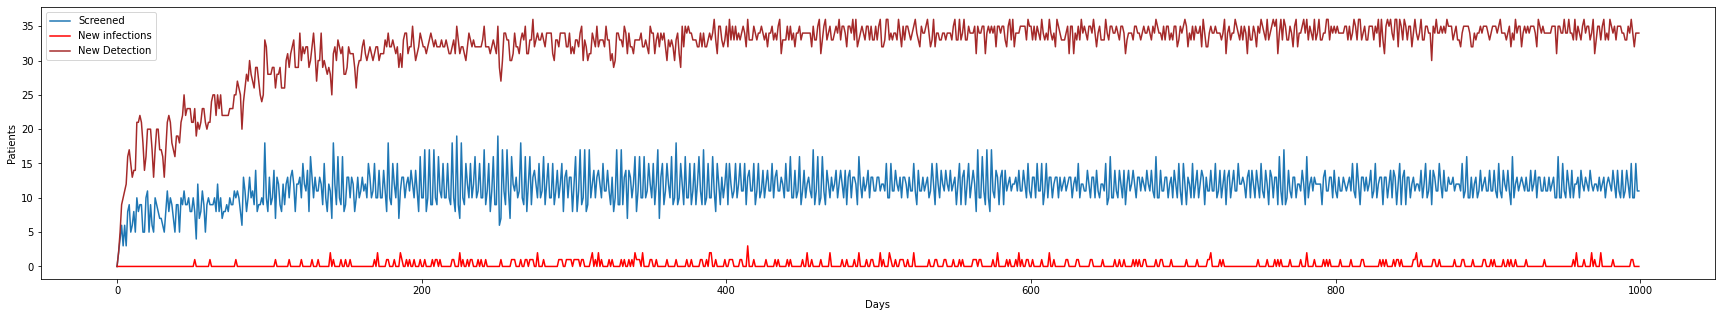

In [6]:
plt.figure(figsize=(30,5))
plt.plot(history.time,history.screened)
plt.plot(history.time,history.new_infections, color='red')
plt.plot(history.time,history.new_detected, color='brown')
plt.legend(["Screened","New infections","New Detection"])
plt.xlabel("Days")
plt.ylabel("Patients")
plt.show()

In [ ]:
plt.figure(figsize=(30,5))
plt.plot(history.time,history.total)
plt.plot(history.time,history.colonized, color='red')
plt.plot(history.time,history.healed, color='brown')
plt.legend(["Total","Colonized","Healed"])
plt.xlabel("Days")
plt.ylabel("Patients")
plt.show()